In [22]:
#import data from files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
infiles = [
    "maxLatenciesCBSMaxLatency.csv",
    "maxLatenciesCBSMaxLatency_wSIS.csv",
    # "maxLatenciesCBSMaxLatency_wCF.csv",
    "maxLatenciesCBSMaxLatency_wCF_wCIS.csv",
    "maxLatenciesCBSMaxLatency_wCF_wCIS_KMFS.csv"
]

In [24]:
calculated = dict()
filtered_calculated = dict()
filtered_calculatedStages = dict()
for infile in infiles:
    setting = infile.split("maxLatenciesCBSMaxLatency")[1].split(".csv")[0].replace("_", " ")
    calculated[setting] = pd.read_csv(infile)
    filtered_calculatedStages[setting] = calculated[setting][calculated[setting][' Note'].str.contains('Stages=5queue')]
    filtered_calculated[setting] = {
        # "PFaster": dict(), 
        # "PFasterV2": dict(),
        # "P100": dict(), 
        # "BA": dict(), 
        "Q": dict(), 
        "QHaeckel": dict(),
        "QHaeckelReverse": dict()
        }
    for row in filtered_calculatedStages[setting].iterrows():
        inputCount = int(row[1][' Note'].split("Inputs=")[1].split("-")[0])
        # filtered_calculated[setting]["PFasterV2"][inputCount] = row[1][" PFasterV2"]
        # filtered_calculated[setting]["PFaster"][inputCount] = row[1][" PFaster"]
        # filtered_calculated[setting]["P100"][inputCount] = row[1][" P100"]
        # filtered_calculated[setting]["BA"][inputCount] = row[1][" BA"]
        filtered_calculated[setting]["Q"][inputCount] = row[1][" Q"]
        filtered_calculated[setting]["QHaeckel"][inputCount] = row[1][" QHaeckel"]
        filtered_calculated[setting]["QHaeckelReverse"][inputCount] = row[1][" QHaeckelR"]


In [25]:
variableSlopeSim = pd.read_json('variableSlopeQueueDelay.json')
filtered_variableSlopeSim = dict()
#iterate over studies
for study in variableSlopeSim:
    # filter for itervars "S" = 5
    stages = int(variableSlopeSim[study]["itervars"]["S"])
    if stages not in filtered_variableSlopeSim.keys():
        filtered_variableSlopeSim[stages] = dict()
    # get inputCount
    inputCount = int(variableSlopeSim[study]["itervars"]["IL"])
    for vector in variableSlopeSim[study]["vectors"]:
        if vector["name"] == "delay:vector":
            filtered_variableSlopeSim[stages][inputCount] = np.max(vector["value"])
# sort according to inputCount
for stages in filtered_variableSlopeSim:
    filtered_variableSlopeSim[stages] = dict(sorted(filtered_variableSlopeSim[stages].items()))
filtered_variableSlopeSim

{20: {1: 0.00012303500000000002,
  2: 0.000307132408,
  3: 0.00017639586,
  4: 0.00026590475999999997,
  5: 0.0003020229,
  6: 0.000332064035,
  7: 0.000349294857,
  8: 0.000362360368,
  9: 0.000378920105,
  10: 0.000472805093,
  11: 0.000414038417,
  12: 0.000371528272,
  13: 0.000351781455},
 5: {1: 0.000123057548,
  2: 0.000290850301,
  3: 0.000249777369,
  4: 0.000330963002,
  5: 0.000327711153,
  6: 0.00032949638099999997,
  7: 0.000348141857,
  8: 0.000352309013,
  9: 0.000369370566,
  10: 0.000353483018,
  11: 0.000383278183,
  12: 0.000350426647,
  13: 0.000351098008},
 8: {5: 0.000336019043},
 4: {5: 0.000329787112},
 3: {5: 0.000326179809},
 6: {5: 0.0003283243},
 7: {5: 0.000333613361},
 9: {5: 0.00034402395},
 10: {5: 0.00033565647899999997},
 12: {5: 0.000336734581},
 1: {5: 0.000255790783},
 11: {5: 0.000336883644},
 14: {5: 0.000342476894},
 15: {5: 0.000342557409},
 13: {5: 0.000342656094},
 17: {5: 0.00036198185999999997},
 16: {5: 0.000342795},
 18: {5: 0.000354345349

In [26]:

fixedSlopeSim = pd.read_json('fixedSlopeQueueDelay.json')
filtered_fixedSlopeSim = dict()
#iterate over studies
for study in fixedSlopeSim:
    # filter for itervars "S" = 5
    stages = int(fixedSlopeSim[study]["itervars"]["S"])
    if stages not in filtered_fixedSlopeSim.keys():
        filtered_fixedSlopeSim[stages] = dict()
    # get inputCount
    inputCount = int(fixedSlopeSim[study]["itervars"]["IL"])
    for vector in fixedSlopeSim[study]["vectors"]:
        if vector["name"] == "delay:vector":
            filtered_fixedSlopeSim[stages][inputCount] = np.max(vector["value"])
                
for stages in filtered_fixedSlopeSim:
    filtered_fixedSlopeSim[stages] = dict(sorted(filtered_fixedSlopeSim[stages].items()))
filtered_fixedSlopeSim

{5: {1: 0.00012303500000000002,
  2: 0.0007792150000000001,
  3: 0.0007943150000000001,
  4: 0.0008002150000000001,
  5: 0.0008057950000000001,
  6: 0.000808415,
  7: 0.0008094350000000001,
  8: 0.000809895,
  9: 0.0008121150000000001,
  10: 0.000812655,
  11: 0.000810155,
  12: 0.0008089350000000001,
  13: 0.000813315},
 20: {1: 0.000123758453,
  2: 0.00257542,
  3: 0.00259564,
  4: 0.00262974,
  5: 0.00264108,
  6: 0.0026436999999999997,
  7: 0.00264344,
  8: 0.00264262,
  9: 0.0026474,
  10: 0.00264794,
  11: 0.0026403200000000003,
  12: 0.00263654,
  13: 0.0026486},
 4: {5: 0.00068276},
 7: {5: 0.0010493050000000002},
 3: {5: 0.000562285},
 8: {5: 0.00117234},
 9: {5: 0.001302095},
 6: {5: 0.0009288300000000001},
 1: {5: 0.000316215},
 18: {5: 0.00239501},
 10: {5: 0.00141841},
 12: {5: 0.00166192},
 14: {5: 0.00190543},
 16: {5: 0.0021514999999999998},
 15: {5: 0.002028465},
 13: {5: 0.0017849550000000002},
 17: {5: 0.0022745350000000003},
 11: {5: 0.001538885},
 19: {5: 0.0025180

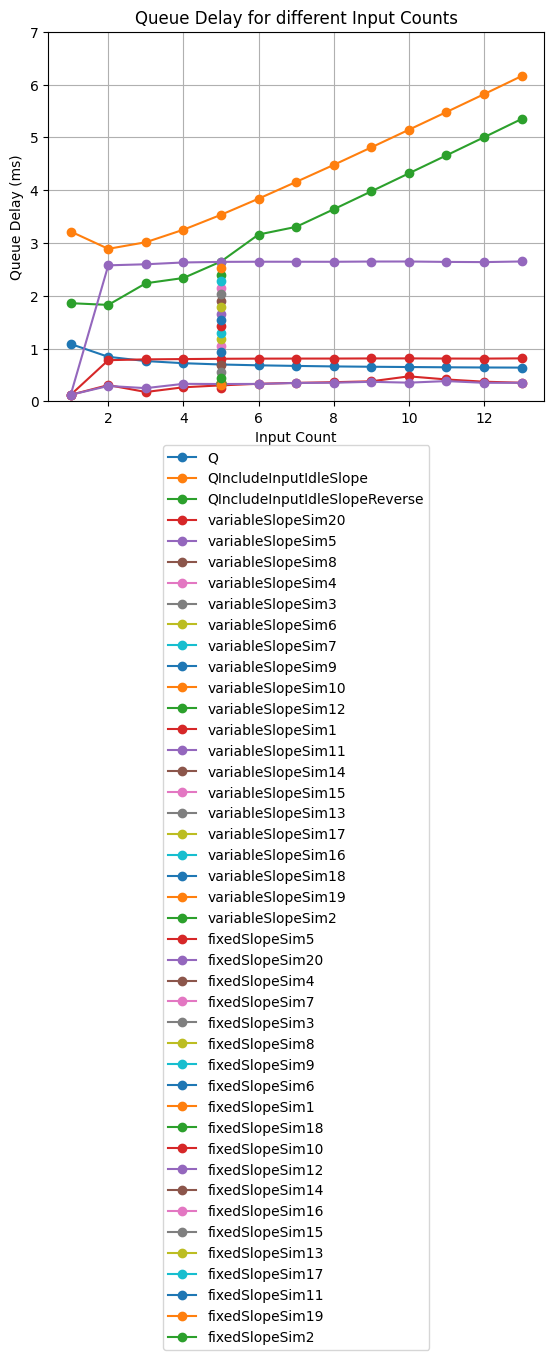

In [27]:
for key in filtered_calculated[""]:
    plt.plot(filtered_calculated[""][key].keys(), [value * 1000 for value in filtered_calculated[""][key].values()], 'o-', label=key.replace("Haeckel", "IncludeInputIdleSlope"))
for key in filtered_variableSlopeSim:
    plt.plot(filtered_variableSlopeSim[key].keys(), [value * 1000 for value in filtered_variableSlopeSim[key].values()], 'o-', label='variableSlopeSim' + str(key))
for key in filtered_fixedSlopeSim:
    plt.plot(filtered_fixedSlopeSim[key].keys(), [value * 1000 for value in filtered_fixedSlopeSim[key].values()], 'o-', label='fixedSlopeSim' + str(key))
plt.xlabel('Input Count')
plt.ylabel('Queue Delay (ms)')
plt.title('Queue Delay for different Input Counts')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.ylim(0, 7)
plt.grid(True)  # Add this line to show grid lines

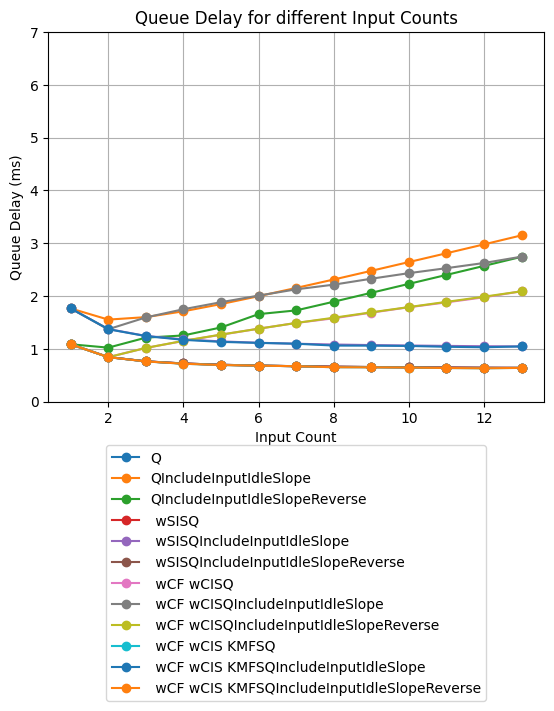

In [28]:
for file in filtered_calculated:
    for key in filtered_calculated[file]:
        plt.plot(filtered_calculated[file][key].keys(), [value * 1000 for value in filtered_calculated[file][key].values()], 'o-', label=file + key.replace("Haeckel", "IncludeInputIdleSlope"))
# plt.plot(filtered_variableSlopeSim.keys(), [value * 1000 for value in filtered_variableSlopeSim.values()], 'o-', label='variableSlopeSim')
# plt.plot(filtered_fixedSlopeSim.keys(), [value * 1000 for value in filtered_fixedSlopeSim.values()], 'o-', label='fixedSlopeSim')
plt.xlabel('Input Count')
plt.ylabel('Queue Delay (ms)')
plt.title('Queue Delay for different Input Counts')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.ylim(0, 7)
plt.grid(True)  # Add this line to show grid lines


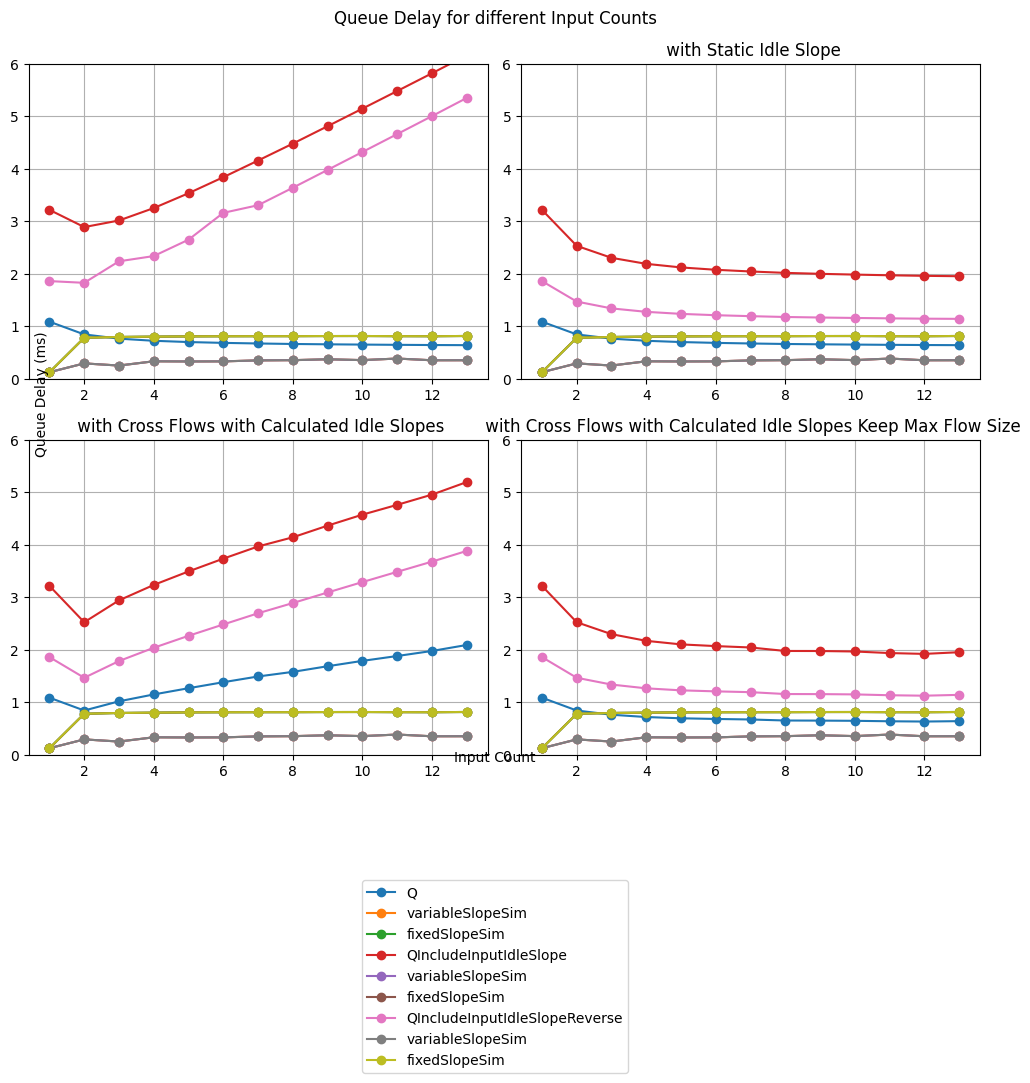

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot for filtered_calculated
for i, file in enumerate(filtered_calculated):
    for j, key in enumerate(filtered_calculated[file]):
        axs[i//2, i%2].plot(filtered_calculated[file][key].keys(), [value * 1000 for value in filtered_calculated[file][key].values()], 'o-', label=file + key.replace("Haeckel", "IncludeInputIdleSlope"))
        # add title to each subplot
        axs[i//2, i%2].set_title(file.replace("wCF","with Cross Flows").replace("wSIS","with Static Idle Slope").replace("wCIS","with Calculated Idle Slopes").replace("KMFS","Keep Max Flow Size"))
        # Set y-axis limit to 0-6
        axs[i//2, i%2].set_ylim(0, 6)
        axs[i//2, i%2].plot(filtered_variableSlopeSim[5].keys(), [value * 1000 for value in filtered_variableSlopeSim[5].values()], 'o-', label='variableSlopeSim')
        axs[i//2, i%2].plot(filtered_fixedSlopeSim[5].keys(), [value * 1000 for value in filtered_fixedSlopeSim[5].values()], 'o-', label='fixedSlopeSim')

# Set common labels and title
fig.text(0.5, 0.04, 'Input Count', ha='center')
fig.text(0.04, 0.5, 'Queue Delay (ms)', va='center', rotation='vertical')
fig.suptitle('Queue Delay for different Input Counts')

# Add legend
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1))


# Show grid lines
for ax in axs.flat:
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


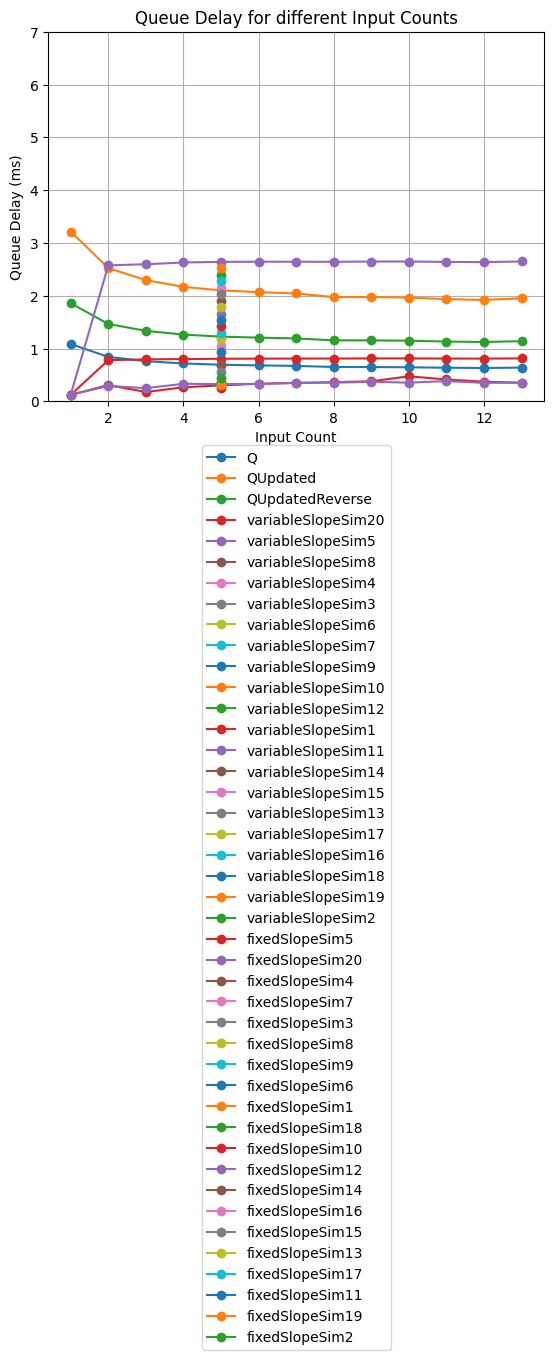

In [30]:
# plot only the wCF wCIS KMFS Q
fig, ax = plt.subplots()
for file in filtered_calculated:
    if "KMFS" in file:
        for key in filtered_calculated[file]:
            if "Q" in key:
                ax.plot(filtered_calculated[file][key].keys(), [value * 1000 for value in filtered_calculated[file][key].values()], 'o-', label=file.replace("wCF","").replace("wCIS","").replace("KMFS","").strip() + key.replace("Haeckel", "Updated"))
                
for key in filtered_variableSlopeSim:
    ax.plot(filtered_variableSlopeSim[key].keys(), [value * 1000 for value in filtered_variableSlopeSim[key].values()], 'o-', label='variableSlopeSim' + str(key))
for key in filtered_fixedSlopeSim:
    ax.plot(filtered_fixedSlopeSim[key].keys(), [value * 1000 for value in filtered_fixedSlopeSim[key].values()], 'o-', label='fixedSlopeSim' + str(key))
plt.xlabel('Input Count')
plt.ylabel('Queue Delay (ms)')
plt.title('Queue Delay for different Input Counts')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.ylim(0, 7)
plt.grid(True)  # Add this line to show grid lines
plt.show()


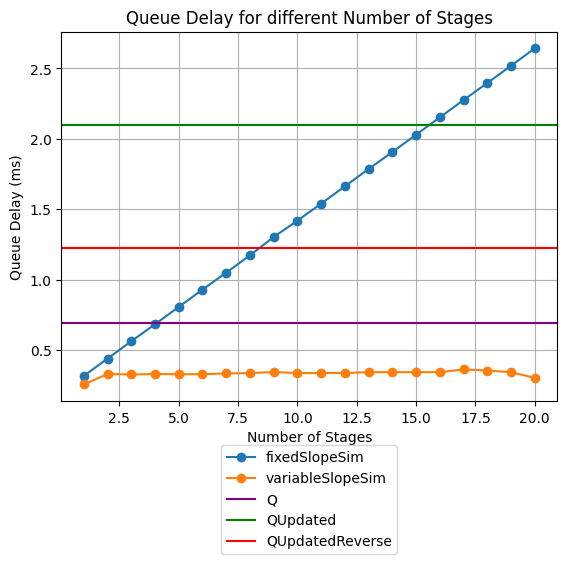

In [38]:
# plot fixed and variable slope sim for input count 5 with number of stages on the x axis and the delay on the y axis
fig, ax = plt.subplots()
# collect results for fixed slope sim and input count 5 
fixedSlopeSimInputCount5 = dict()
for key in filtered_fixedSlopeSim.keys():
    fixedSlopeSimInputCount5[key] = filtered_fixedSlopeSim[key][5]
# sort the dict
fixedSlopeSimInputCount5 = dict(sorted(fixedSlopeSimInputCount5.items()))
# collect results for variable slope sim and input count 5
variableSlopeSimInputCount5 = dict()
for key in filtered_variableSlopeSim.keys():
    variableSlopeSimInputCount5[key] = filtered_variableSlopeSim[key][5]
# sort the dict
variableSlopeSimInputCount5 = dict(sorted(variableSlopeSimInputCount5.items()))
# plot the collected results
ax.plot(fixedSlopeSimInputCount5.keys(), [value * 1000 for value in fixedSlopeSimInputCount5.values()], 'o-', label='fixedSlopeSim')
ax.plot(variableSlopeSimInputCount5.keys(), [value * 1000 for value in variableSlopeSimInputCount5.values()], 'o-', label='variableSlopeSim')
# draw a line for the two q formula results and input count 5
for file in filtered_calculated:
    if "KMFS" in file:
        for key in filtered_calculated[file]:
            if "Q" in key:
                value = filtered_calculated[file][key][5]
                color = "purple"
                addText = ""
                if "Haeckel" in key:
                    color = "green"
                if "Reverse" in key:
                    color = "red"
                if not "Haeckel" in key:
                    addText = "Maile"
                # draw a line at value
                ax.axhline(y=value * 1000, color=color, linestyle='-', label=file.replace("wCF","").replace("wCIS","").replace("KMFS","").strip() + key.replace("Haeckel", "Updated") + addText)

plt.xlabel('Number of Stages')
plt.ylabel('Queue Delay (ms)')
plt.title('Queue Delay for different Number of Stages')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.grid(True)  # Add this line to show grid lines
plt.show()
